### Temperature distribution in a rectangular plate solved with FDE

##### Two-Dimensional Heat Equation:

$\frac{{\partial^2 T}}{{\partial x^2}} + \frac{{\partial^2 T}}{{\partial y^2}} = \frac{1}{\alpha} \frac{{\partial T}}{{\partial t}}$

###### Approximations for Partial Derivatives::

$\frac{{\partial^2 T}}{{\partial x^2}} \approx \frac{{T(x_{i+1}, y_j) - 2T(x_i, y_j) + T(x_{i-1}, y_j)}}{{(\Delta x)^2}}$

$\frac{{\partial^2 T}}{{\partial y^2}} \approx \frac{{T(x_i, y_{j+1}) - 2T(x_i, y_j) + T(x_i, y_{j-1})}}{{(\Delta y)^2}}$

$\frac{{\partial T}}{{\partial t}} \approx \frac{{T(x_i, y_j, t + \Delta t) - T(x_i, y_j, t)}}{{\Delta t}}$

###### Next step equation:

$T^{n+1}_{i,j} = T^n_{i,j} + \frac{{\alpha \Delta t}}{{(\Delta x)^2}} \left( T^n_{i+1,j} - 2T^n_{i,j} + T^n_{i-1,j} \right) + \frac{{\alpha \Delta t}}{{(\Delta y)^2}} \left( T^n_{i,j+1} - 2T^n_{i,j} + T^n_{i,j-1} \right)$

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# phisical parameters
L = 1.0  # length
W = 3.0  # width
T_ambient = 20.0  # ambient temperature
T_left = 25.0 # temperature on left edge
T_right = 60.0 # temperature on right edge
T_bottom = 100.0 # temperature on bottom edge
T_top = 75.0 # temperature on top edge
alpha = 0.01  # thermal diffusivity coefficient

In [23]:
# numerical parameters
Nx = 50
Ny = 50
Nt = 1000
dx = L / (Nx - 1)
dy = W / (Ny - 1)
dt = 0.01

In [24]:
def fdm():
    T = np.ones((Nx, Ny)) * T_ambient

    # edge conditions
    T[:, 0] = T_left
    T[:, -1] = T_right
    T[0, :] = T_bottom
    T[-1, :] = T_top

    for t in range(Nt):
        Tn = T.copy()
        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                T[i, j] = Tn[i, j] + alpha * dt * (
                    (Tn[i + 1, j] - 2 * Tn[i, j] + Tn[i - 1, j]) / dx**2 +
                    (Tn[i, j + 1] - 2 * Tn[i, j] + Tn[i, j - 1]) / dy**2
                )

    x = np.linspace(0, L, Nx)
    y = np.linspace(0, W, Ny)
    X, Y = np.meshgrid(x, y)

    return X, Y, T

In [25]:
def plot_solution(X, Y, T):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, T.T, cmap='viridis')
    ax.set_xlabel('X [m]')
    ax.set_ylabel('Y [m]')
    ax.set_zlabel('temperature [°C]')
    ax.set_title('Temperature distribution in a plate')
    plt.colorbar(surf)
    plt.show()

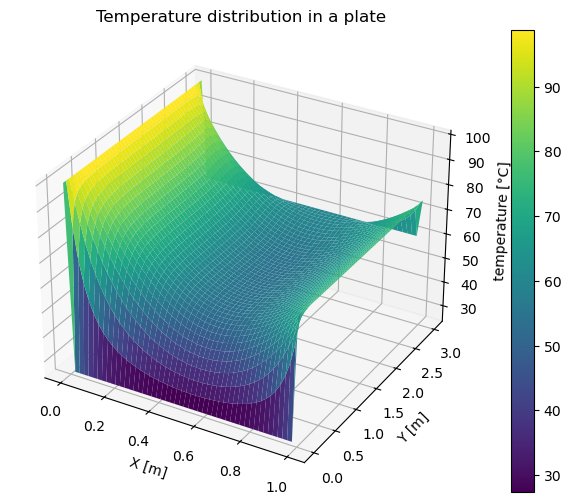

In [26]:
X, Y, T = fdm()
plot_solution(X, Y, T)